# 머신러닝 개요

## 머신러닝이란
머신러닝(machine learning)이란 기계가 스스로 데이터를 학습하여 서로 다른 변수 간의 관계를 찾아 나가는 과정  

## 지도 학습 vs 비지도 학습

|구 분|지도학습(supervised learning)|비지도학습(unsupervised learning)|
|-----|-----------------------------|---------------------------------|
|알고리즘(분석모형)|회귀분석, 분류|군집분석|
|특징|<p>정답을 알고잇는 상태에서 학습<br>모형 평가 방법이 다양한 편</p>|<p>정답이 없는 상태에서 서로 비슷한 데이터를 찾아서 그룹화<br>모형평가 방법이 제한적</p>|


## 머신러닝 프로세스

1. 데이터 정리
2. 데이터 분리(훈련/검증)
3. 알고리즘 준비
4. 모형 학습(훈련 데이터)
5. 예측 (검증 데이터)
6. 모형 평가
7. 모형 활용

# 회귀분석
회귀분석(regression)은 머신러닝 알고리즘 중에서도 비교적 이해하기 쉽고, 널리 활용되고 있는 대표적인 알고리즘이다.  

## 단순회귀분석
두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 단순회귀분석(Simple Linear Regression)이라고 말한다. 대표적인 지도학습 유형이다.

### Step1 - 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
             'acceleration', 'model year', 'origin', 'name']

# 데이터 살펴보기
print(df.head())
print('\n')

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

### Step2 - 데이터 탐색
데이터에 대한 기본적인 정보를 확인한다. info() 메소드로 데이터의 자료형과 개수를 확인하고, describe() 메소드를 실행하여 주요 통계 정보를 확인한다.

In [2]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약 정ㅈ보 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

describe() 메소드의 실행 결과에 엔진출력을 나타내는 `horsepower`열이 포함되지 않는다. `horsepower`열의 자료형이 문자열(object)이므로 숫자형으로 변경할 필요가 있다.  
엔진출력을 나타내는 `horsepower`열의 자료형을 문자열(object)에서 숫자형으로 변경한다.  
이를 위해 `horsepower` 열의 고유값 중에서 누락 데이터를 뜻하는 '?' 문자가 있는 행들을 찾아서 제거하고, astype() 메소드로 실수형을 변환한다.

In [3]:
# horsepower 열의 자료형 변경 (문자열 -> 숫자)
print(df['horsepower'].unique()) # horsepower 열의 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True) #'?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis= 0, inplace=True) # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float') # 문자열을 실수형으로 변환

print(df.describe())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1

## Step3 - 속성 선택
단순회귀분석에 변수로 사용할 후보 열을 선택한다. 예측 목표인 종속 변수(Y)가 될 'mpg'열과 독립변수(X)로 사용할 후보로 3개의 열 ('cylinders', 'horsepower', 'weight')을 포함한다.

In [4]:
'''
[Step 3] 속성(feature 또는 variable) 선택
'''

# 분석에 활용할 열(속성) 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


3개의 후보 중에서 단순회귀분석에 사용할 독립 변수를 선택한다. 종속 변수(Y)와 독립 변수(X)간의 일대일 관계를 찾는 것이므로 두 변수 간에 선형관계가 있는지 그래프를 그려서 확인한다.

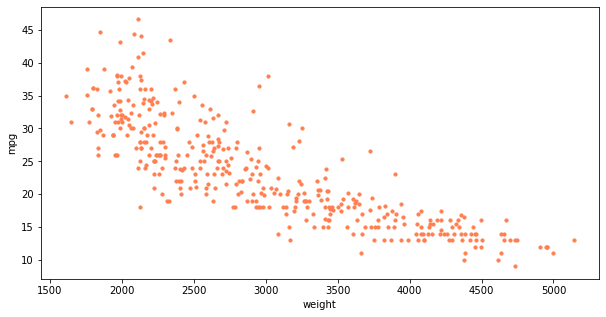

In [5]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s= 10, figsize=(10,5))
plt.show()
plt.close()

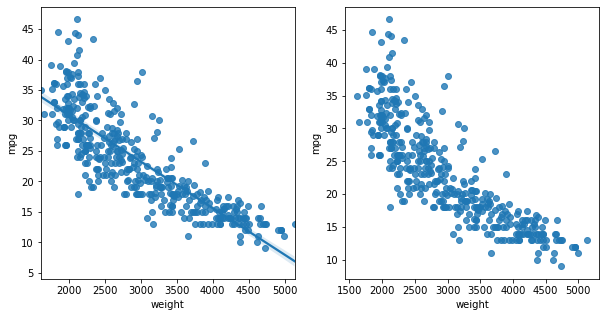

In [6]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1) #회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False) # 회귀선 미표시
plt.show()
plt.close()

산점도를 그릴 때 Seaborn 라이브러리의 jointplot() 함수를 이용 할 수도 있다. 두 변수의 히스토그램이 x,y축에 별도로 표시되는 특징이 있다. `kind='reg'` 옵션을 사용하면 회귀선을 표시한다.

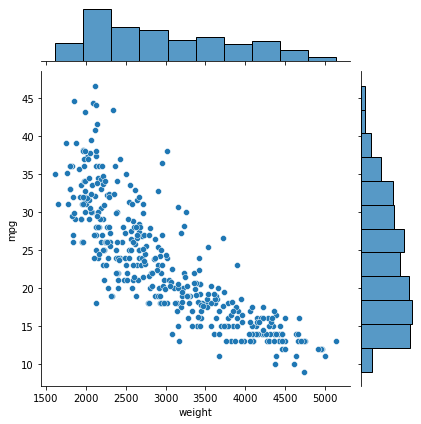

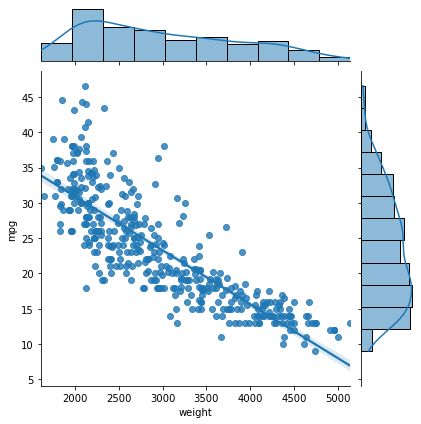

In [7]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf) # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf) # 회귀선 표시
plt.show()
plt.close()

이번에는 Seaborn 라이브러리의 pairplot() 함수를 사용하여 데이터프레임의 열을 두 개씩 짝을 지을 수 있는 모든 경우의 수에 대하여 두 변수 간의 산점도를 그린다. 단, 자기 자신과의 관계는 히스토그램으로 표시한다. 앞에서는 각 변수에 대하여 하나씩 그래프를 그리는 것이지만, pairplot() 함수를 사용하면 한번에 모든 경우의 수에 대하여 그래프로 나타낼 수 있다.

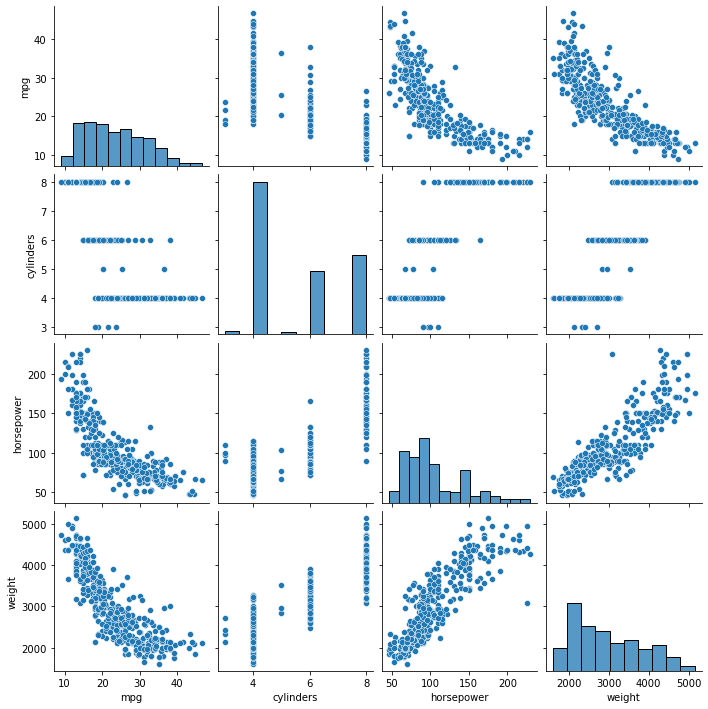

In [8]:
# seaborn pairplot으로 두 변수 간의 모든 경우의 수 그리기
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

### Step4 - 훈련/검증 데이터 분할
앞에서 그린 산점도에서 `mpg`열과 선형관계를 부이는 `horsepower`열과 `weight`열을 독립 변수 X로 선택하는 것을 고려한다. 다음은 두 변수 간의 회귀방정식을 찾을 차례이다. 훈련 데이터와 검증 데이터로 나눠서 모형을 구축한다. 예제는 `weight`열을 독립 변수X로 선택하고 데이터를 7:3의 비율로 분할한다. 훈련 데이터 274개, 검증 데이터 118개로 나뉜다.

In [9]:
'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/검증용(test data)
'''

# 속성(변수) 선택
X = ndf[['weight']] # 독립 변수 X
y = ndf['mpg'] # 종속변수 Y

# train data와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, # 독립 변수
                                                    y, # 종속 변수
                                                    test_size=0.3, # 검증 30%
                                                    random_state=10) # 랜덤 추출 값
print('train data 개수:', len(X_train))
print('test_data 개수:', len(X_test))

train data 개수: 274
test_data 개수: 118


### Step5 - 모형 학습 및 검증
sklearn 라이브러리에서 선형회귀분석 모듈을 사용한다. LinearRegression() 함수로 회귀분석 모형 객체를 생성하여 변수 lr에 저장한다.  
모형 객체(lr)에 fit() 메소드를 적용하고 훈련 데이터(X_train, y_train)를 전달하면 모형이 학습을 통해 회귀 방정식 계수 a,b를 찾는다.  
학습을 마친 모형의 예측 능력을 평가하기 위해 검증 데이터를 score() 메소드에 전달하여 lr 모형의 결정계수(R-제곱)를 구한다.  
결정계수 값이 클수록 모형의 예측 능력이 좋다고 판단한다.

In [12]:
'''
[Step 5] 단순회귀분석 모형 만들기 - sklearn 사용
'''

# sklearn 라이브러리에서 선혀오히귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299325


회귀선의 관계식 즉, 회귀방정식을 구하는 계수 a,b를 확인할 수 있다. 계수 a는 회귀식의 기울기를 나타내고, 모형 객체 lr의 coef_ 속성값이다. 계수 b는 y 절편이고, 모형 객체 lr의 intercept_ 속성값이다. 본 예제에서 a는 -0.00775이고, b는 46.7103이다.

In [13]:
# 회귀식의 기울기
print('기울기 a:', lr.coef_)
print('\n')

# 회귀식의 y 절편
print('y절편 b', lr.intercept_)

기울기 a: [-0.00775343]


y절편 b 46.710366257280086


모형이 예측한 결과와 실제 값을 비교해 본다. 독립 변수 전체 데이터(X)를 predict() 메소드에 입력하여 모형이 반환하는 예측값을 y_hat에 저장한다. 실제 값 y와 모형의 예측값 y_hat을 같은 화면에 분포도를 그려서 비교한다. Seaborn 라이브러리의 distplot() 함수를 사용한다.

C:\Users\singo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\singo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


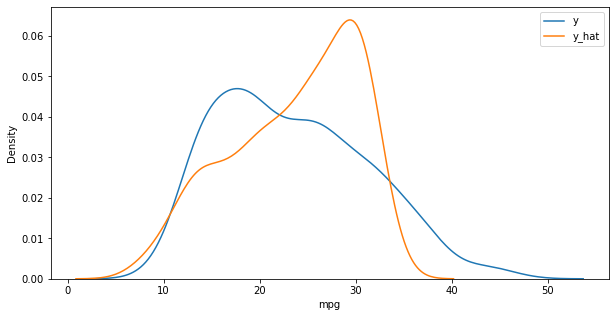

In [15]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
ax1.legend(loc='best')
plt.show()
plt.close()

출력된 결과를 보면 실제 값은 왼쪽으로 편향되어 있고 예측 값은 반대로 오른쪽으로 편증되는 경향을 보인다.  
따라서 독립 변수(weight)와 종속 변수(mpg) 사이에 선형관계가 있지만, 모형의 오차를 더 줄일 필요가 있어 보인다.  
앞에서 그린 산점도를 보면 직선보다는 곡선의 형태가 더 적합해 보인다. 이럴 경우 비선형 회귀분석을 통해 모형의 정확도를 높을 수 있다.

## 다항회귀분석
앞에서 살펴본 단순회귀분석은 두 변수 간의 관계를 직선 형태로 설명하는 알고리즘이다.  
독립 변수 X와 종속 변수 Y 사이에 선형의 상관관계가 잇지만, 직선보다는 곡선으로 설명하는 것이 적합할 때는 단순회귀분석은 부적합하다.  
이럴 때 다항 함수를 사용하면 보다 복잡한 곡선 형태의 회귀선을 표현할 수 있다.

### 데이터 준비

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1~4] 데이터 준비
'''

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']

# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?', np.nan, inplace=True) # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float') # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data와 test data로 구분 (7:3 비율)
X = ndf[['weight']] # 독립 변수 X
y = ndf['mpg'] # 종속 변수 Y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터:', X_test.shape)

훈련 데이터:  (274, 1)
검증 데이터: (118, 1)


### 모형 학습 및 검증
sklearn 라이브러리에서 선형회귀분석을 위한 LinearRegression() 함수와 다항식 변환을 위한 PolynomialFeatures() 함수를 불러온다. 그리고 PolynomialFeatures(degree=2) 명령으로 2차항 객체인 poly를 생성한다. 독립 변수로 사용할 X_train 데이터를 fit_transform() 메소드에 전달하면 2차항 회귀분석에 맞게 변환된다. X_train의 1개 열이 X_train_poly에서는 3개의 열로 늘어난다.

In [19]:
'''
[Step 5] 비선형회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree=2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


LinearRegression() 함수로 회귀분석 모형 객체를 생성하여 변수 pr에 저장한다. 2차항으로 변환된 훈련 데이터(X_train_poly, y_train)를 fit() 메소드에 전달하여 pr 모형을 학습시킨다. 모형 학습이 완료되면 검증 데이터를 사용하여 모형의 예측 능력을 평가한다. 검증 데이터 또한 poly 객체를 사용하여 2차항으로 변환해주어야한다. score() 메소드로 모형의 결정계수(R-제곱)를 구한다.

In [20]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 (R-제곱) 계산
X_test_poly = poly.fit_transform(X_test) # X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.7087009262975685


훈련 데이터의 분포와 학습된 모형의 회귀선을 그래프로 출력해서 비교한다. 2차항으로 변환된 검증 데이터(X_test_poly)를 predict() 메소드에 입력하여 예측한 결과인 y_hat_test를 빨간점('+')으로 표시하면 회귀선이 된다.

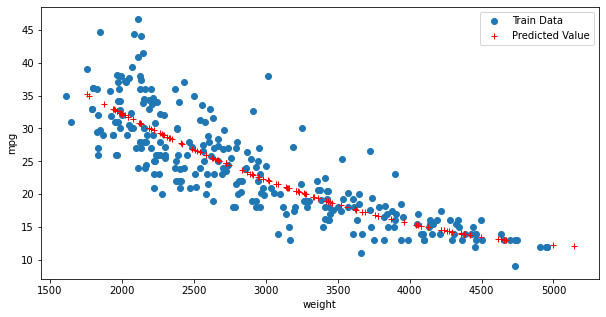

In [21]:
# train data의 산점도와 test_data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label='Train Data')
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

모형이 예측한 결과와 실제 값을 비교한다. 데이터셋의 전체 x 데이터를 2차항으로 변환하여 predict() 메소드에 전달한다. 여기서 모형이 예측한 값을 y_hat에 저장한다. Seaborn 라이브러리의 distplot()함수를 사용하여 실제 값 y와 예측값 y_hat의 분포 차이를 비교한다.

C:\Users\singo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\singo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


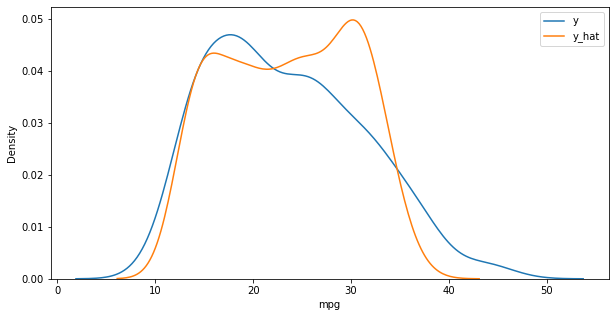

In [23]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
ax1.legend(loc='best')
plt.show()
plt.close()

## 다중회귀분석
단순회귀분석은 소득이 증가하면 소비가 증가하는 것처럼 종속 변수 Y에 영향을 주는 독립 변수 X가 하나인 경우를 말한다. 하지만 소비에 영향을 주는 독립 변수에는 소득 외에도 자녀의 수, 거주지, 직업 등 다른 요인이 있을 수 있다. 이처럼 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석(Multivariate Regression)을 사용한다.

### 데이터 준비

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1~3] 데이터 준비
'''

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']
# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?', np.nan, inplace=True) # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float') # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/검증용(test data)
'''

# 속성(변수) 선택
X = ndf[['cylinders', 'horsepower', 'weight']] # 독립 변수 X1, X2, X3
y = ndf['mpg'] # 종속 변수 Y

# train data와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

print('훈련 데이터:', X_train.shape)
print('검증 데이터:', X_test.shape)

훈련 데이터: (274, 3)
검증 데이터: (118, 3)


### 모형 학습 및 검증
LinearRegression() 함수를 사용하여 회귀분석 모형 객체(lr)를 생성한다. 그리고 앞에서 분리한 훈련 데이터(X_train, y_train)를 입력하여 fit() 메소드로 모형을 학습시킨다. 모형학습이 완료 되면 훈련 데이터를 제외한 나머지 검증 데이터(X_test, y_test)를 사용하여 모형의 평가 지표인 결정계수(R-제곱)를 구한다. 반환된 결정계수 값은 0.6939로 비교적 양호한 수준이다.

In [28]:
'''
[Step 5] 단순회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져우기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 (R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('X 변수의 개수 a:', lr.coef_)
print('\n')

# 회귀식의 y 절편
print('상수항 b', lr.intercept_)


0.6939048496695597


X 변수의 개수 a: [-0.60691288 -0.03714088 -0.00522268]


상수항 b 46.41435126963408


C:\Users\singo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\singo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


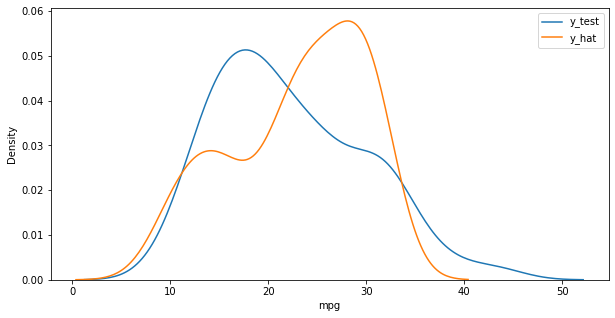

In [31]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 =sns.distplot(y_test, hist=False, label='y_test')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
ax1.legend(loc='best')
plt.show()
plt.close()

# 분류
분류(classification) 알고리즘은 예측하려는 대상의 속성(설명 변수)을 입력 받고, 목표 변수가 갖고 있는 카테고리(범주형) 값 중에서 어느 한 값으로 분류하여 예측한다. 다음과 같이 훈련 데이터에 목표 변수 값(0 또는 1)을 함께 입력하기 때문에 지도 학습 유형에 속하는 알고리즘이다.
이 모형은 고객 분류, 질병 진단, 스팸 메일 필터링, 음성 인식 등 목표 변수가 카테고리 값을 갖는 경우에 사용한다.  
KNN, SVM, Decision Tree, Logistic Regression 등 다양한 알고리즘이 존재하는데 이 책에서는 KNN, SVM, Decision Tree에 대해 설명한다.

## KNN
KNN은 k-Nearest-Neighbors의 약칭이다. k개의 가까운 이웃이라는 뜻이다. 새로운 관측값이 주어지면 기존 데이터 중에서 가장 속성이 비슷한 k개의 이웃을 먼저 찾는다. 그리고 가까운 이웃들이 갖고 있는 목표 값과 같은 값으로 분류하여 예측한다. 이 책에서는 이웃과의 유사성을 측정하기 위한 수학적 개념에 대해서는 다루지 않을 예정이다.  
한편 k값에 따라 예측의 정확도가 달라지므로, 정확한 k값을 찾는 것은 매우 중요하다.

### Step 1 - 데이터 준비

In [32]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns
'''
[Step 1] 데이터 준비 - Seaborn에서 제공하는 titanic 데이터셋 가져오기
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

# 데이터 살펴보기
print(df.head())
print('\n')

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)
print(df.head())

   survived  pclass     sex   age  sibsp  ...  adult_male  deck  embark_town  \
0         0       3    male  22.0      1  ...        True   NaN  Southampton   
1         1       1  female  38.0      1  ...       False     C    Cherbourg   
2         1       3  female  26.0      0  ...       False   NaN  Southampton   
3         1       1  female  35.0      1  ...       False     C  Southampton   
4         0       3    male  35.0      0  ...        True   NaN  Southampton   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  

[5 rows x 15 columns]


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0 

### Step 2 - 데이터 탐색
info() 메소드로 데이터의 자료형과 개수를 확인한 결과 `age`, `embarked`, `deck` 등 일부 열에 누락 데이터가 포함되어 있다. 데이터의 특성과 분석 목표에 맞춰 누락 데이터를 처리한다.

In [33]:
'''
[Step 2] 데이터 탐색/전처리
'''

# 데이터 자료형 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


객실 테크 위치를 나타내는 `deck`열에는 유효한 값이 203개에 불과하다. 688개의 누락 데이터가 있는데 전체 891명의 승객 중에서 688명의 데이터가 존재하지 않는다는 뜻이다. 따라서 `deck` 열을 제거하기로 한다. 그리고 승선도시를 나타내는 `embark_town` 열은 `embarked`열과 동일한 의미를 갖기 때문에 중복을 없애기 위해 열 자체를 제거한다. 열 이름을 출력해 보면 `deck`열과 `embark_town`열이 삭제된 것을 확인 할 수 있다.

In [34]:
# NaN 값이 많은 deck 열 삭제, embarked와 내용이 겹치는 embark_town 열 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)
print(rdf.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


승객의 나이를 나타내는 `age` 열에 누락 데이터가 177개 포함되어 있다. 분석에 포함시켜야 하는 중요한 속성으로 판단될 경우 예측 결과에 영향을 최소화하는 방법을 선택해야 한다. 평균 나이로 치환하는 방법도 가능하지만 누락 데이터가 있는 행을 모두 제거하기로 한다. 즉 177명의 승객 데이터를 포기하고 나이 데이터가 있는 174명의 승객만을 분석 대상으로 한다.

In [35]:
# age 열에 나이 데이터가 없는 모든 행 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
print(len(rdf))

714


`embarked` 열에는 승객들이 타이타닉호에 탑승한 도시명의 첫 글자가 들어 있다. 누락데이터가 2개에 불과하므로 탑승한 승객이 가장 많은 도시명으로 치환한다. value_counts() 메소드와 idxmax() 메소드를 사용하여 승객이 가장 많이 탑승한 도시명의 첫 글자가 'S'라는 것을 알 수 있다.

In [38]:
# embarked 열의 NaN 값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
print('\n')

print(rdf.describe(include='all'))
print('\n')

rdf['embarked'].fillna(most_freq, inplace=True)

S


          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000

### Step3 - 속성 선택
변수로 사용할 후보 열을 선택한다. 예측 변수로 생존 여부를 나타내는 `survived` 열을 추가하고 설명 변수로 사용할 후보 열을 6개 포함한다.  
head() 메소드로 데이터의 구성을 살펴보자.

In [39]:
'''
[Step 3] 분석에 사용할 속성 선택
'''

# 분석에 활용할 열(속성) 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
print(ndf.head())

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


KNN 모형에 적용하기 위해 `sex`열과 `embarked`열의 범주형 데이터를 숫자형으로 변환한다.  
이 과정을 더미 변수를 만든다고 하고 원핫인코딩(one-hot-encoding)이라고도 부른다.

In [40]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace = True)
print(ndf.head())

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


### Step4 - 훈련/검증 데이터 분할

Step 3에서 정리한 열 중에서 예측 변수인 'survived' 열을 변수 y에 저장하고, 나머지 열들을 설명 변수로 사용하기 위하여 변수 X에 할당한다. 그리고 설명 변수 열들이 갖는 데이터의 상대적 크기 차이를 없애기 위하여 정규화 과정을 거친다. 이때 sklearn의 preprocessing 모듈을 사용한다. trian_test_split() 메소드를 사용하여 훈련 데이터와 검증 데이터를 나눈다.(검증 30%)

In [42]:
'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/검증용(test data)
'''

# 속성(변수) 선택
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male',
        'town_C', 'town_Q', 'town_S']] # 설명변수 X
y = ndf['survived']

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test_data로 구분(7:3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수:', X_test.shape)

train data 개수:  (499, 9)
test data 개수: (215, 9)


### Step5 - 모형 학습 및 검증
sklearn 라이브러리의 neighbors 모듈을 사용한다. KNeighborsClassifier() 함수로 KNN 분류 모형 객체를 생성하여 변수 knn에 저장한다.  
예제에서는 n_neighbors=5와 같이 이웃의 숫자를 5개로 설정한다.

In [43]:
'''
[Step 5] KNN 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성(k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형학습
knn.fit(X_train, y_train)

# test_data를 가지고 y_hat을 예측(분류)
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [44]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

[[109  16]
 [ 25  65]]


In [45]:
# 모형 성능 평가 - 평가 지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



## SVM
SVM은 Support Vector Machine의 약자이다. 이름에서 알 수 있듯이 벡터(Vector) 개념을 가져와서 사용한다. 데이터셋의 여러 속성을 나타내는 데이터프레임의 각 열은 열 벡터 형태로 구현된다. 열 벡터들이 각각 고유의 축을 갖는 벡터공간을 만드는데, 분석 대상이 되는 개별 관측값은 모든 속성(열 벡터)에 관한 값을 해당 축의 좌표로 표시하여 벡터공간에서의 위치를 나타낸다. 속성(열 벡터_이 2개 존재하는 데이터셋은 2차원 평면 공간에 좌표로 표시하고, 속성이 3개이면 3차원 공간에 표시한다. 4차 이상의 고차원 벡터 공간의 좌표를 사용하는 것도 가능하다.

### 데이터 준비

In [47]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)

'''
[Step 2] 데이터 탐색/전처리
'''

# NaN 값이 많은 deck 열 삭제, embarked와 내용이 겹치는 embark_town 열 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)

# age 열에 나이 데이터가 없는 모든 행 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)

# embarked 열의 NaN 값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)

'''
[Step 3] 분석에 사용할 속성 선택
'''

# 분석에 활용할 열(속성) 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis = 1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/검증용(test_data)
'''

# 속성(변수) 선택
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male',
        'town_C', 'town_Q', 'town_S']]
y = ndf['survived']

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수:', X_train.shape)
print('test data 개수:', X_test.shape)

train data 개수: (499, 9)
test data 개수: (215, 9)


### 모형 학습 및 검증
sklearn에서 가져온 svm 모듈의 SVC() 함수를 사용하여 모형 객체(svm_model)를 생성한다. 이 때 데이터를 벡터 공간으로 매핑하는 함수를 커널(kernel)이라고 하는데, kernel='rbf' 옵션으로 RBF(Radical Basis Function)함수를 적용한다. 이외에 Linear, Polynomial, Sigmoid 등의 커널이  있다.  
훈련 데이터(X_train, y_train)를 fit() 메소드에 전달하여 모형을 학습시킨다. 학습이 끝나면, 검증 데이터(X_test)를 predict() 메소드에 입력하여 예측한 결과를 변수 y_hat에 저장한다.

In [48]:
'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성(kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf')

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)

# test_data를 가지고 y_hat 예측(분류)
y_hat = svm_model.predict(X_test)
print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


모형의 예측 능력을 평가하는 지표를 계산한다. 먼저 confusion_matrix() 함수로 Confusion Matrix를 계산한다.  
그리고 classification_report() 함수로 precison, recall, f1-score 지표를 출력한다. f1-score 지표를 보면 미생존자(0) 예측의 정확도가 0.86이고, 생존자(1) 예측의 정확도는 0.73으로 예측 능력에 차이가 있다.

In [49]:
# 모델의 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가 지표 계산
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



## Decision Tree

Decision Tree는 의사결정 나무라는 뜻이다. 컴퓨터 알고리즘에서 즐겨 사용하는 트리(tree) 구조를 사용하고, 각 분기점(node)에는 분석 대상의 속성(설명 변수)들이 위치한다. 각 분기점마다 목표 값을 가장 잘 분류할 수 있는 속성을 찾아서 배치하고, 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만든다.  
각 분기점에서 최적의 속성을 선택할 때는 해당 속성을 기준으로 분류한 값들이 구분되는 정도를 측정한다. 다른 종류의 값들이 섞여 있는 정도를 나타내는 Entropy를 주로 활용하는데, Entropy가 낮을 수록 분류가 잘 된 것이다. Entropy가 일정 수준 이하로 낮아질 때까지 앞의 과정을 반복한다.

### 데이터 준비

In [51]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
'''
[Step 1] 데이터 준비/기본 설정
'''


# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)

'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())
print('\n')

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약 정보 확인
print(df.describe())

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   cl

출력 결과를 보면 문자열(object) 데이터를 갖는 'bare_nuclei' 열을 제외한 나머지 열은 모두 숫자형이다.  
따라서 'bare_nuclei' 열을 숫자형으로 변환하면 모형을 인식하는데 문제가 없다.  
'bare_nuclei' 열의 데이터가 갖는 고유한 unique() 메소드로 확인하면, 데이터 중에 '?'이 섞여 있음을 알 수 있다. '?'을 np.nan으로 바꿔주고 해당 데이터가 들어있는 행을 dropna() 메소드를 이용하여 전부 삭제한다.

In [53]:
# bare_nuclei 열의 자료형 변경( 문자열 -> 숫자)
print(df['bare_nuclei'].unique())
print('\n')

df['bare_nuclei'].replace('?', np.nan, inplace=True)
df.dropna(subset=['bare_nuclei'], axis=0, inplace = True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

print(df.describe())

['1' '10' '2' '4' '3' '9' '7' nan '5' '8' '6']


                 id       clump   cell_size  cell_shape    adhesion  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial  bare_nuclei   chromatin  normal_nucleoli     mitoses  \
count  683.000000   683.000000  683.000000       683.000000  683.000000   
mean     3.234261     3.544656    3.445095         2.869693    1.603221   
std      2.223085     3.643857    2.449697         3.052666    1.732674   
min      1.

데이터프레임에서 설명 변수 X로 사용할 열들을 먼저 선택하고, 예측 변수로 사용할 `class` 열을 선택한다.  
설명 변수를 정규화하고 훈련 데이터와 검증 데이터를 분리한다. 검증 데이터에 30% 할당한 결과 훈련 데이터는 478개이고, 검증 데이터는 205개이다.

In [54]:
'''
[Step 3] 데이터셋 구분 - 훈련용(train data)/검증용(test data)
'''

# 속성(변수) 선택
X = df[['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
       'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']] # 설명변수 X
y = df['class']

# 설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data와 test data 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)

print('train data 개수:', X_train.shape)
print('test data 개수:', X_test.shape)

train data 개수: (478, 9)
test data 개수: (205, 9)


### 모형 학습 및 검증
sklearn 라이브러리 의 tree 모듈을 임포트한다. DecisionTreeClassifier() 함수를 사용하여 모형 객체(tree_model)를 생성한다. 예제에서는 각 분기점에서 최적의 속성을 찾기 위해 분류 정도를 평가하는 기준으로 'entropy' 값을 사용한다. 트리 레벨을 5로 지정하는데, 5단계까지 가지를 확장할 수 있다는 뜻이다. 레벨이 많아질수록 모형 학습에 사용하는 훈련 데이터에 대한 예측은 정확해진다. 하지만 모형이 훈련데이터에 대해서만 지나치게 최적화되어 실제 데이터 예측 능력은 떨어지는 문제가 발생한다. 따라서 적정한 레벨값을 찾는 것은 중요하다.

In [55]:
'''
[Step 4] Decision Tree 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

# 모형 객체 생성(criterion='entropy' 적용)
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

# train data를 가지고 모형 학습
tree_model.fit(X_train, y_train)

# test data를 가지고 y_hat 예측(분류)
y_hat = tree_model.predict(X_test) # 2: begin(양성), 4: malignant(악성)

print(y_hat[0:10])
print(y_test.values[0:10])

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


In [56]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)
print('\n')

# 모형 성능 평가 - 평가 지표 계산
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

[[127   4]
 [  2  72]]


              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



# 군집
군집(clustering) 분석은 데이터셋의 관측값이 갖고 있는 여러가지 속성을 분석하여 서로 비슷한 특징을 갖는 관측값끼리 같은 클러스터(집단)로 묶는 알고리즘이다.

## K-Means
k-Means 알고리즘은 데이터 간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지 거리를 이용한다. 벡터 공간에 위치한 어떤 데이터에 대하여 k개의 클러스터가 주여졌을 때 클러스터의 중심까지 거리가 가장 가까운 클러스터로 해당 데이터를 할당한다. 다른 클러스타 간에는 서로 완전하게 구분하기 위하여 일정한 거리 이상 떨어져야 한다. 한편 몇 개의 클러스터로 데이터를 구분할 것인지를 결정하는 k 값에 따라 모형의 성능이 달라진다. 일반적으로 k가 클수록 모형의 정확도는 개선되지만, k 값이 너무 커지면 선택지가 너무 많아지므로 분석의 효과가 사라진다.

### 데이터 준비

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

'''
[Step 1] 데이터 준비
'''

# Wholesale customers 데이터셋 가져오기 ( 출처: UCL ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())
print('\n')

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약 정보 확인
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

데이터프레임 전체를 모형의 학습 데이터로 사용. 비지도 학습 모형이므로 예측 변수를 지정할 필요가 없고 필요한 속성을 모두 설명 변수로 활용한다. StandardScalar() 함수 등을 이용하여 학습 데이터를 정규화하면 모형 학습을 위한 모든 준비가 끝난다. 이를 통해 서로 다른 변수 사이에 존재  할 수 있는 데이터 값의 상대적 크기 차이에서 발생하는 오류를 제거한다.

In [60]:
'''
[Step 3] 데이터 전처리
'''

# 분석에 사용할 속성 선택
X = df.iloc[:, :]
print(X[:5])
print('\n')

# 설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


### 모형 학습 및 검증
sklearn 라이브러리의 cluster 모듈을 활용한다. KMeans() 함수로 모형 객체를 생성하는데, n_clusters 옵션을 사용하여 클러스터의 개수를 5로 지정한다. 앞에서 선택한 학습 데이터를 fit() 메소드에 전달하고 모형에 적용하여 주면 모형은 스스로 학습하여 설정한 클러스터 개수만큼 데이터를 구분한다. 모형의 `labels_` 속성에 구분한 클러스터 값이 입력된다.

In [61]:
'''
[Step 4] K-means 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
kmeans.fit(X)

# 예측(군집)
cluster_label = kmeans.labels_
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 4 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 4 1 1 0 0 1 1 0 0 4 1 0 0 1 4 1 1 0 4 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 1 4 4 0 0 0 0 0 4 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 4 0 2 0
 0 0 0 1 1 0 0 0 1 0 0 3 1 3 3 1 1 3 3 3 1 3 3 3 1 3 4 3 3 1 3 1 3 1 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 4 3 3 3 3 3 3 3
 3 3 3 3 3 1 3 1 3 1 3 3 3 3 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 3 1
 3 1 1 3 1 1 1 1 1 1 1 3 3 1 3 3 1 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3
 4 3 1 3 3 3 3 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

모형을 8개의 속성(변수)을 이용하여 각 관측값을 5개의 클러스터로 구분한다. 8개의 변수를 하나의 그래프로 표현할 수 없기 때문에 2개의 변수를 선택하여 관측값의 분포를 그려본다.

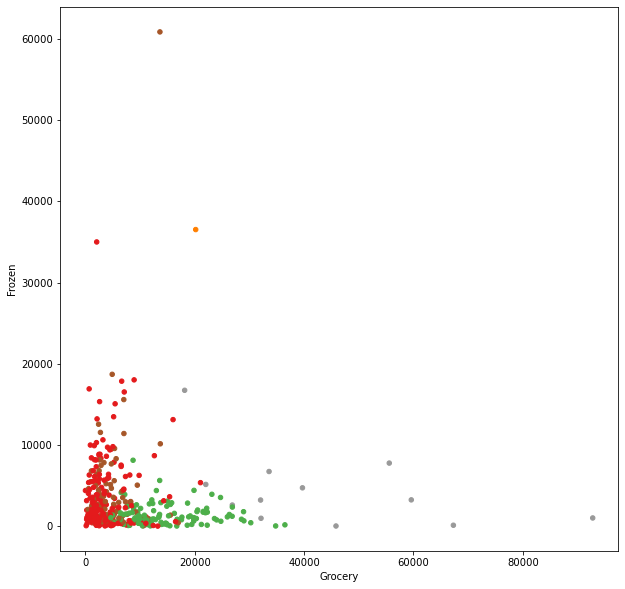

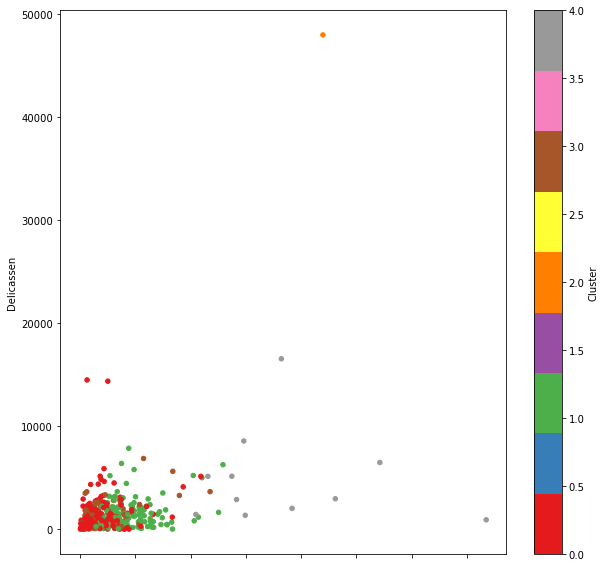

In [62]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x= 'Grocery', y = 'Frozen', c='Cluster', cmap='Set1',
       colorbar=False, figsize = (10,10))
df.plot(kind='scatter', x='Milk', y= 'Delicassen', c='Cluster', cmap='Set1',
       colorbar=True, figsize = (10, 10))
plt.show()
plt.close()

다른 값들에 비해 지나치게 큰 값으로 구성되는 클러스터에 속하는 값들을 제외하고 다시 그려본다. 데이터들이 몰려 있는 구간을 확대해서 자세하게 파악할 수 있다. 클러스터 라벨이 0, 4인 데이터를 제외하고 클러스터 1, 2, 3에 속하는 데이터만을 변수 ndf에 저장한다.

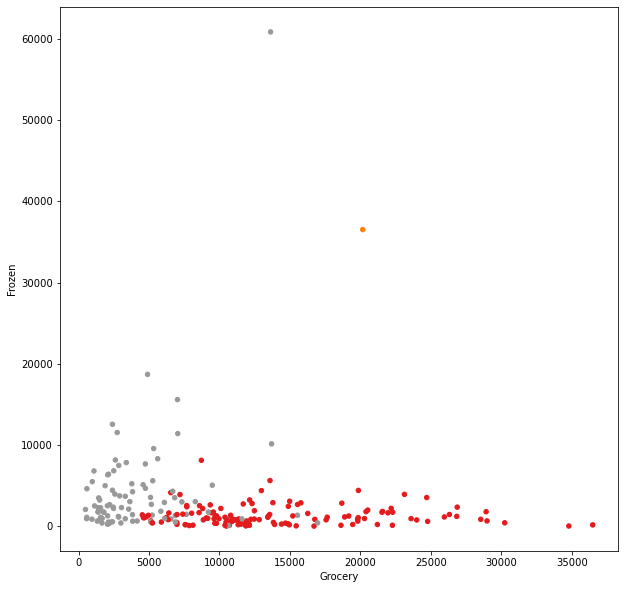

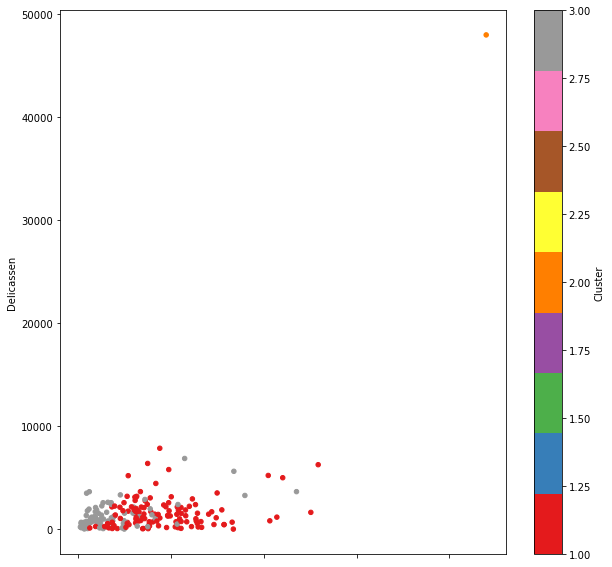

In [63]:
# 큰 값으로 구성된 클러스터(0,4) 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] ==4 )
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1',
        colorbar=False, figsize=(10,10))
ndf.plot(kind='scatter', x='Milk', y= 'Delicassen', c='Cluster', cmap='Set1',
        colorbar=True, figsize=(10,10))
plt.show()
plt.close()

## DBSCAN
DBSCAN(Density-Based Spatial Clustering of Applications with Noise)은 이름에서 알 수 있듯이 데이터가 위치하고 있는 공간 밀집도를 기준으로 클러스터를 구분한다. 자기를 중심으로 반지름 R의 공간에 최소 M개의 포인트가 존재하는 점을 코어 포인트(core point)라고 부른다. 코어 포인트는 아니지만 반지름 R 안에 다른 코어 포인트가 있을 경우 경계 포인트(border point)라고 한다. 코어 포인트도 아니고 경계 포인트에도 속하지 않는 점을 Noise(또는 outlier)라고 부른다.

### 데이터 준비

In [66]:
import pandas as pd
import folium

'''
[Step 1] 데이터 준비/기본 설정
'''

# 서울시내 중학교 진학률 데이터셋
file_path = '2016_middle_shcool_graduates_report.xlsx'
df = pd.read_excel(file_path, header=0)

# IPython Console 디스플레이 옵션 설정하기
pd.set_option('display.width', None) # 출력 화면의 너비
pd.set_option('display.max_rows', 100) # 출력할 행의 개수 한도
pd.set_option('display.max_columns', 10) # 출력할 열의 개수 한도
pd.set_option('display.max_colwidth', 20) # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True) # 유니코드 사용 너비 조절

# 열 이름 배열 출력
print(df.columns.values)

['Unnamed: 0' '지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고'
 '외고_국제고' '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']


In [67]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())
print('\n')

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약 정보 확인
print(df.describe())

   Unnamed: 0    지역                               학교명  코드  유형  ...  \
0           0  성북구  서울대학교사범대학부설중학교.....       3  국립  ...   
1           1  종로구  서울대학교사범대학부설여자중학교...     3  국립  ...   
2           2  강남구           개원중학교                     3  공립  ...   
3           3  강남구           개포중학교                     3  공립  ...   
4           4  서초구           경원중학교                     3  공립  ...   

  기타진학  취업   미상       위도        경도  
0    0.004     0  0.000  37.594942  127.038909  
1    0.031     0  0.000  37.577473  127.003857  
2    0.009     0  0.003  37.491637  127.071744  
3    0.019     0  0.000  37.480439  127.062201  
4    0.010     0  0.000  37.510750  127.008900  

[5 rows x 21 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역          415 non-null    object 
 2   학교명         415 non-nul

각 중학교의 위치 데이터를 나타내는 '위도'열과 '경도'열을 folium.CircleMarker() 함수에 전달하면 각 위치를 지도에 원형 마커를 표시한다. '학교명' 열을 popup옵션에 할당하여 원형 마커를 클릭할 때 학교명이 팝업으로 표시되도록 설정한다.

In [70]:
# 지도에 위치 표시
mschool_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain',
                        zoom_start = 12)

# 중학교 위치 정보를 CircleMarker로 표시
for name, lat, lng in zip(df.학교명,df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                       radius=5,
                       color = 'brown',  # 원의 둘레 색상
                       fill = True,
                       fill_color = 'coral', # 원을 채우는 색
                        fill_opacity= 0.7, # 투명도
                        popup=name
                       ).add_to(mschool_map)

mschool_map

데이터프레임의 열 데이터 중에서 모형이 인식할 수 없는 문자열 데이터를 더미 변수로 변환한다. 
'지역', '코드', '유형', '주야' 열을 원핫인코딩으로 변환하여 'location', 'code', 'type', 'day' 열에 저장하고 데이터프레임에 추가한다.

In [71]:
'''
[Step 3] 데이터 전처리
'''

# 원핫인코딩(더미 변수)
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() # label encoder 생성
onehot_encder = preprocessing.OneHotEncoder() # one hot encoder 생성

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

print(df.head())

   Unnamed: 0    지역                               학교명  코드  유형  ...  \
0           0  성북구  서울대학교사범대학부설중학교.....       3  국립  ...   
1           1  종로구  서울대학교사범대학부설여자중학교...     3  국립  ...   
2           2  강남구           개원중학교                     3  공립  ...   
3           3  강남구           개포중학교                     3  공립  ...   
4           4  서초구           경원중학교                     3  공립  ...   

         경도  location  code  type  day  
0  127.038909        16     0     1    0  
1  127.003857        22     0     1    0  
2  127.071744         0     0     0    0  
3  127.062201         0     0     0    0  
4  127.008900        14     0     0    0  

[5 rows x 25 columns]


### 모형 학습 및 검증
먼저 '과학고', '외고_국제고', '자사고' 열을 선택하여 설명 변수 X로 할당한다. 그리고 StandardScaler() 메소드로 정규화 처리하고 cluster 모듈의 DBSCAN() 함수를 적용하여 모형 객체(dbm)를 생성한다. 밀도 계산의 기준이 되는 반지름 R(eps=0.2)과 최소 포인트 개수 M(min_samples=5)을 옵션에 설정한다. fit() 메소드를 이용하여 학습 데이터를 dbm 모형에 전달하면 모형은 데이터를 여러 개의 클러스터로 구분한다.

In [73]:
'''
[Step 4] DBSCAN 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 분석에 사용할 속성 선택(과학고, 외고_국제고, 자사고 진학률)
columns_list = [9, 10, 13]
X = df.iloc[:, columns_list]
print(X[:5])
print('\n')

# 설명 변수 데이터 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# DBSCAN 모형 객체 생성
dbm = cluster.DBSCAN(eps=0.2, min_samples=5)

# 모형 학습
dbm.fit(X)

# 예측(군집)
cluster_label = dbm.labels_
print(cluster_label)
print('\n')

# 예측 겨로가를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

   특성화고  과학고  마이스터고
0     0.148   0.018       0.011
1     0.199   0.000       0.000
2     0.047   0.009       0.006
3     0.097   0.013       0.019
4     0.017   0.007       0.000


[-1  0 -1 -1  1  5 -1 -1  2 -1 -1 -1  2  0 -1 -1 -1 -1 -1  2 -1 -1 -1  0
  1  2 -1  1  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  3
 -1 -1 -1  3 -1  1 -1 -1  4 -1 -1  4 -1 -1  4  0 -1  5  0  6  1 -1  0  1
 -1  0  8 -1 -1 -1  4 -1  3 -1 -1  3  4 -1 -1 -1  3 -1  0  2 -1  0 -1 -1
  5  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  0 -1
 -1 -1  5  8  0 -1 -1 -1 -1 -1  7  3  0 -1  5  0  4 -1  5 -1 -1 -1 -1 -1
 -1  6 -1 -1 -1  8  4 -1 -1  6 -1 -1 -1 -1 -1  0  6 -1 -1 -1 -1 -1 -1  6
 -1 -1  7 -1 -1  6 -1  0  0 -1  3 -1  6  8 -1  6 -1 -1 -1 -1 -1 -1  5  0
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  6  0 -1 -1 -1 -1 -1  4 -1 -1  3 -1 -1
  0 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  9  0
  9 -1 -1 -1 -1  5  0 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1 -1  0  4 -1 -1  0
 -1 -1  0  0 -1

In [77]:
# 클러스터 값으로 그룹화하고 그룹별로 내용 출력(첫 5행만 출력)
grouped_cols = [0, 1, 3] + columns_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped_cols].head())
    print('\n')

# 그래프로 표현 - 시각화
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan', 11:'tan'}

cluster_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster_map)
cluster_map

* key : -1
* number : 234
   Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
0           0  성북구     3     0.148   0.018       0.011
2           2  강남구     3     0.047   0.009       0.006
3           3  강남구     3     0.097   0.013       0.019
6           6  강남구     3     0.015   0.015       0.000
7           7  강남구     3     0.000   0.032       0.000


* key : 0
* number : 70
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
1            1  종로구     3     0.199     0.0         0.0
13          13  서초구     3     0.032     0.0         0.0
23          23  강남구     3     0.025     0.0         0.0
28          28  서초구     3     0.040     0.0         0.0
29          29  강남구     3     0.051     0.0         0.0


* key : 1
* number : 7
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
4            4  서초구     3     0.017   0.007         0.0
24          24  강남구     3     0.026   0.007         0.0
27          27  강남구     3     0.006   0.006         0.0
53          53  강동구     3     0.020   0.007         0.0
68          68  

In [78]:
# X2 데이터셋에 대하여 위의 과정을 반복
columns_list2 = [9, 10, 13, 22]
X2 = df.iloc[:, columns_list2]
print(X2[:5])
print('\n')

X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm2.fit(X2)
df['Cluster2'] = dbm2.labels_

grouped2_cols = [0, 1, 3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('*key:', key)
    print('*number:', len(group))
    print(group.iloc[:, grouped2_cols].head())
    print('\n')

cluster2_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain',
                         zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):
    folium.CircleMarker([lat, lng],
                       radius=5,
                       color =colors[clus],
                       fill=True,
                       fill_color = colors[clus],
                       fill_opacity=0.7,
                       popup=name).add_to(cluster2_map)
cluster2_map

   특성화고  과학고  마이스터고  code
0     0.148   0.018       0.011     0
1     0.199   0.000       0.000     0
2     0.047   0.009       0.006     0
3     0.097   0.013       0.019     0
4     0.017   0.007       0.000     0


*key: -1
*number: 238
   Unnamed: 0    지역  코드  특성화고  과학고  마이스터고  code
0           0  성북구     3     0.148   0.018       0.011     0
2           2  강남구     3     0.047   0.009       0.006     0
3           3  강남구     3     0.097   0.013       0.019     0
6           6  강남구     3     0.015   0.015       0.000     0
7           7  강남구     3     0.000   0.032       0.000     0


*key: 0
*number: 70
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고  code
1            1  종로구     3     0.199     0.0         0.0     0
13          13  서초구     3     0.032     0.0         0.0     0
23          23  강남구     3     0.025     0.0         0.0     0
28          28  서초구     3     0.040     0.0         0.0     0
29          29  강남구     3     0.051     0.0         0.0     0


*key: 1
*number: 7
    U

In [80]:
# X3 데이터셋에 대하여 위의 과정을 반복(과학고, 외고_국제고)
columns_list3= [9, 10]
X3 = df.iloc[:, columns_list3]
print(X3[:5])
print('\n')

X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
dbm3 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm3.fit(X3)
df['Cluster3'] = dbm3.labels_
grouped3_cols = [0, 1,3] + columns_list3
grouped3 = df.groupby('Cluster3')
for key, group in grouped3:
    print('*key:', key)
    print('*number:', len(group))
    print(group.iloc[:, grouped3_cols].head())
    print('\n')
cluster3_map = folium.Map(location=[37.55, 126.98], tiles='Stamen terrain',
                         zoom_start = 12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):
    folium.CircleMarker([lat, lng],
                       radius=5,
                       color =colors[clus],
                       fill=True,
                       fill_color=colors[clus],
                       fill_opacity=0.7,
                       popup=name
                       ).add_to(cluster3_map)

cluster3_map

   특성화고  과학고
0     0.148   0.018
1     0.199   0.000
2     0.047   0.009
3     0.097   0.013
4     0.017   0.007


*key: -1
*number: 73
    Unnamed: 0    지역  코드  특성화고  과학고
0            0  성북구     3     0.148   0.018
3            3  강남구     3     0.097   0.013
6            6  강남구     3     0.015   0.015
7            7  강남구     3     0.000   0.032
10          10  강남구     3     0.000   0.031


*key: 0
*number: 205
    Unnamed: 0    지역  코드  특성화고  과학고
1            1  종로구     3     0.199     0.0
13          13  서초구     3     0.032     0.0
22          22  강남구     3     0.158     0.0
23          23  강남구     3     0.025     0.0
28          28  서초구     3     0.040     0.0


*key: 1
*number: 104
    Unnamed: 0    지역  코드  특성화고  과학고
2            2  강남구     3     0.047   0.009
5            5  강남구     3     0.066   0.007
11          11  강남구     3     0.064   0.007
15          15  서초구     3     0.046   0.009
32          32  서초구     3     0.131   0.003


*key: 2
*number: 11
    Unnamed: 0    지역  코드  특성